# Início

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base = pd.read_csv('Anac_data.csv')
display(base)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,EMPRESA_SIGLA,EMPRESA_NOME,ANO,MES,AEROPORTO_DE_ORIGEM_SIGLA,AEROPORTO_DE_ORIGEM_NOME,AEROPORTO_DE_ORIGEM_UF,AEROPORTO_DE_ORIGEM_REGIAO,AEROPORTO_DE_DESTINO_SIGLA,AEROPORTO_DE_DESTINO_NOME,...,RPK,ATK,RTK,COMBUSTIVEL_LITROS,DISTANCIA_VOADA_KM,DECOLAGENS,ASSENTOS,PAYLOAD,HORAS_VOADAS,BAGAGEM_KG
0,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,2022,1,SBSV,SALVADOR,BA,NORDESTE,SIRI,MARAÚ,...,4902,1901,364,1624,1806,14,126,14755,9.33800,0
1,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,2022,1,SBSV,SALVADOR,BA,NORDESTE,SNCL,CAIRU,...,27971,7089,2061,5624,6308,76,684,85682,38.45000,0
2,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,2022,1,SIRI,MARAÚ,BA,NORDESTE,SBSV,SALVADOR,...,10836,1901,808,1624,1806,14,126,14755,9.33800,0
3,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,2022,1,SNCL,CAIRU,BA,NORDESTE,SBSV,SALVADOR,...,46563,6821,3468,5550,6225,75,675,82450,36.50000,0
4,ABJ,ATA - AEROTÁXI ABAETÉ LTDA.,2022,2,SBSV,SALVADOR,BA,NORDESTE,SIRI,MARAÚ,...,4515,1088,336,928,1032,8,72,8440,5.33600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56084,TTL,TOTAL LINHAS AÉREAS S.A.,2024,3,SBPA,PORTO ALEGRE,RS,SUL,SBGR,GUARULHOS,...,0,387960,256408,172812,17320,20,0,448000,34.96670,0
56085,TTL,TOTAL LINHAS AÉREAS S.A.,2024,3,SBPV,PORTO VELHO,RO,NORTE,SBGR,GUARULHOS,...,0,45769,0,10398,2474,1,0,18500,4.05000,0
56086,TTL,TOTAL LINHAS AÉREAS S.A.,2024,3,SBSV,SALVADOR,BA,NORDESTE,SBVT,VITÓRIA,...,0,15614,0,4260,844,1,0,18500,1.48333,0
56087,TTL,TOTAL LINHAS AÉREAS S.A.,2024,3,SBVT,VITÓRIA,ES,SUDESTE,SBGL,RIO DE JANEIRO,...,0,7733,0,2881,418,1,0,18500,1.10000,0


# Substuindo valores com vírgula por pontos e transformando em float

In [6]:
# base['HORAS_VOADAS'] = base['HORAS_VOADAS'].str.replace(',','.')
# base['HORAS_VOADAS'] = base['HORAS_VOADAS'].astype(float)
# base['MES'] = base['MES'].astype(int)
# base.to_csv("Anac_data.csv")
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56089 entries, 0 to 56088
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EMPRESA_SIGLA                56089 non-null  object 
 1   EMPRESA_NOME                 56089 non-null  object 
 2   ANO                          56089 non-null  int64  
 3   MES                          56089 non-null  int64  
 4   AEROPORTO_DE_ORIGEM_SIGLA    56089 non-null  object 
 5   AEROPORTO_DE_ORIGEM_NOME     56089 non-null  object 
 6   AEROPORTO_DE_ORIGEM_UF       56089 non-null  object 
 7   AEROPORTO_DE_ORIGEM_REGIAO   56089 non-null  object 
 8   AEROPORTO_DE_DESTINO_SIGLA   56089 non-null  object 
 9   AEROPORTO_DE_DESTINO_NOME    56089 non-null  object 
 10  AEROPORTO_DE_DESTINO_UF      56089 non-null  object 
 11  AEROPORTO_DE_DESTINO_REGIAO  56089 non-null  object 
 12  GRUPO_DE_VOO                 56089 non-null  object 
 13  PASSAGEIROS_PAGO

# Checando se ainda há valores nulos

In [11]:
base.isnull().sum()

EMPRESA_SIGLA                  0
EMPRESA_NOME                   0
ANO                            0
MES                            0
AEROPORTO_DE_ORIGEM_SIGLA      0
AEROPORTO_DE_ORIGEM_NOME       0
AEROPORTO_DE_ORIGEM_UF         0
AEROPORTO_DE_ORIGEM_REGIAO     0
AEROPORTO_DE_DESTINO_SIGLA     0
AEROPORTO_DE_DESTINO_NOME      0
AEROPORTO_DE_DESTINO_UF        0
AEROPORTO_DE_DESTINO_REGIAO    0
GRUPO_DE_VOO                   0
PASSAGEIROS_PAGOS              0
PASSAGEIROS_GRATIS             0
ASK                            0
RPK                            0
ATK                            0
RTK                            0
COMBUSTIVEL_LITROS             0
DISTANCIA_VOADA_KM             0
DECOLAGENS                     0
ASSENTOS                       0
PAYLOAD                        0
HORAS_VOADAS                   0
BAGAGEM_KG                     0
dtype: int64

# Analisando RPK de cada empresa. AZU, GLO e TAM tem os melhores valores de RPK

In [3]:
rpk_empresa = base[['EMPRESA_SIGLA', 'RPK']].groupby('EMPRESA_SIGLA').sum()
display(rpk_empresa)

,RPK
EMPRESA_SIGLA,
ABJ,1076163
ACN,44610779
ASO,34305
AZU,60389506961
GLO,69758887219
LTG,0
MWM,0
OMI,3878388
PAM,158923498


# Analisando ASK de cada empresa. AZU, GLO e TAM tem os melhores valores de ASK

In [4]:
ask_empresa = base[['EMPRESA_SIGLA', 'ASK']].groupby('EMPRESA_SIGLA').sum()
display(ask_empresa)

,ASK
EMPRESA_SIGLA,
ABJ,1817425
ACN,101612136
ASO,72747
AZU,76541811485
GLO,85796545998
LTG,0
MWM,0
OMI,12609696
PAM,248083005


# Por que AZU, GLO e TAM tem os melhores valores? Tem alguma região em que focam mais? R: Sudeste

In [27]:
melhores_empresa = base.loc[(base['EMPRESA_SIGLA'] == 'AZU') | (base['EMPRESA_SIGLA'] == 'GLO') | (base['EMPRESA_SIGLA'] == 'TAM')]
decolagens_regiao = melhores_empresa[['EMPRESA_SIGLA', 'AEROPORTO_DE_DESTINO_REGIAO', 'DECOLAGENS']].groupby(['EMPRESA_SIGLA', 'AEROPORTO_DE_DESTINO_REGIAO']).sum()
display(decolagens_regiao)

DECOLAGENS
EMPRESA_SIGLA AEROPORTO_DE_DESTINO_REGIAO            
AZU           CENTRO-OESTE                      53654
              NORDESTE                         133372
              NORTE                             47676
              SUDESTE                          314631
              SUL                               89852
GLO           CENTRO-OESTE                      59245
              NORDESTE                          89644
              NORTE                             19684
              SUDESTE                          236522
              SUL                               59197
TAM           CENTRO-OESTE                      73235
              NORDESTE                          81031
              NORTE                             20440
              SUDESTE                          269736
              SUL                               65038

# Decolagens por mês em cada região (AZU, GLO e TAM)

In [30]:
decolagens_mes = melhores_empresa[['MES', 'AEROPORTO_DE_DESTINO_REGIAO', 'DECOLAGENS']].groupby(['MES', 'AEROPORTO_DE_DESTINO_REGIAO']).sum()
display(decolagens_mes)


DECOLAGENS
MES AEROPORTO_DE_DESTINO_REGIAO            
1   CENTRO-OESTE                      21640
    NORDESTE                          40304
    NORTE                             10839
    SUDESTE                           92069
    SUL                               24187
2   CENTRO-OESTE                      17961
    NORDESTE                          31465
    NORTE                              9001
    SUDESTE                           79610
    SUL                               20013
3   CENTRO-OESTE                      20416
    NORDESTE                          33139
    NORTE                              9887
    SUDESTE                           89400
    SUL                               23523
4   CENTRO-OESTE                      12975
    NORDESTE                          19945
    NORTE                              5627
    SUDESTE                           57880
    SUL                               15345
5   CENTRO-OESTE                      13960
    NORDESTE                          21067
    NORTE                              6441
    SUDESTE                           62589
    SUL                               16686
6   CENTRO-OESTE                      13374
    NORDESTE                          20558
    NORTE                              6206
    SUDESTE                           58689
    SUL                               15472
7   CENTRO-OESTE                      14798
    NORDESTE                          25095
    NORTE                              7161
    SUDESTE                           65688
    SUL                               16808
8   CENTRO-OESTE                      14552
    NORDESTE                          22359
    NORTE                              6774
    SUDESTE                           64417
    SUL                               16570
9   CENTRO-OESTE                      13740
    NORDESTE                          21228
    NORTE                              6222
    SUDESTE                           61565
    SUL                               15723
10  CENTRO-OESTE                      14092
    NORDESTE                          22172
    NORTE                              6553
    SUDESTE                           62987
    SUL                               16125
11  CENTRO-OESTE                      14057
    NORDESTE                          21537
    NORTE                              6253
    SUDESTE                           61433
    SUL                               16445
12  CENTRO-OESTE                      14569
    NORDESTE                          25178
    NORTE                              6836
    SUDESTE                           64562
    SUL                               17190

# Decolagens por mês gráfico

<Axes: xlabel='MES', ylabel='DECOLAGENS'>

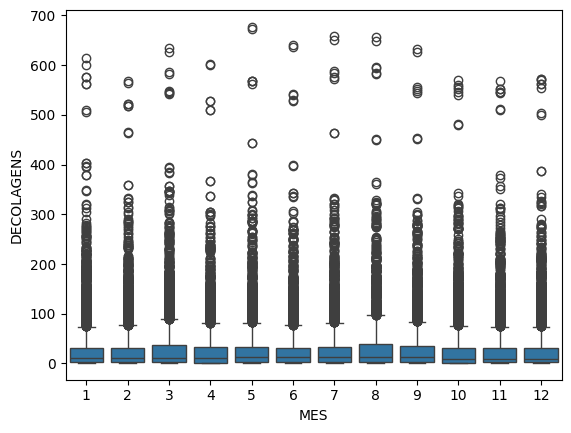

In [5]:
# ax = base.boxplot(column="DECOLAGENS", by="MES", figsize=(8,4))
sns.boxplot(x='MES',y='DECOLAGENS',data=melhores_empresa)

# Relação de passeiros pagos e grátis e grupo de voo de cada empresa

In [16]:
passeiro_empresa = base[['EMPRESA_SIGLA', 'GRUPO_DE_VOO','PASSAGEIROS_PAGOS', 'PASSAGEIROS_GRATIS']].groupby(['EMPRESA_SIGLA', 'GRUPO_DE_VOO']).sum()
display(passeiro_empresa)

PASSAGEIROS_PAGOS  PASSAGEIROS_GRATIS
EMPRESA_SIGLA GRUPO_DE_VOO                                       
ABJ           NÃO REGULAR                   8                   0
              REGULAR                   12467                 224
ACN           IMPRODUTIVO                   0                   0
              NÃO REGULAR                2761                   8
              REGULAR                  134749                1295
ASO           REGULAR                     130                   2
AZU           IMPRODUTIVO               58103                1631
              NÃO REGULAR             1964608               45193
              REGULAR                59024104             1598773
GLO           IMPRODUTIVO               14326                 358
              NÃO REGULAR             1948869               21673
              REGULAR                60466723             1518663
LTG           IMPRODUTIVO                   0                   0
              NÃO REGULAR                   0                   0
              REGULAR                       0                   0
MWM           IMPRODUTIVO                   0                   0
              NÃO REGULAR                   0                   0
              REGULAR                       0                   0
OMI           IMPRODUTIVO                   0                   0
              NÃO REGULAR                4817                 470
PAM           IMPRODUTIVO                  73                   2
              NÃO REGULAR              148030                 160
              REGULAR                  142647                3133
PTB           IMPRODUTIVO                 212                   3
              NÃO REGULAR                3906                 131
              REGULAR                 1427397               23175
SID           IMPRODUTIVO                   0                  44
              NÃO REGULAR               31986                 190
              REGULAR                       0                   0
TAM           IMPRODUTIVO                   0                   3
              NÃO REGULAR              900126               13239
              REGULAR                69444947             1009585
TOT           IMPRODUTIVO                   0                   0
              NÃO REGULAR                   0                   0
TTL           IMPRODUTIVO                  22                   2
              NÃO REGULAR                2308                 124
              REGULAR                       0                   0

# Consumo de combustível por litro de cada empresa

In [3]:
consumo_combustivel = base[['EMPRESA_SIGLA', 'COMBUSTIVEL_LITROS']].groupby(['EMPRESA_SIGLA']).sum()
display(consumo_combustivel)

,COMBUSTIVEL_LITROS
EMPRESA_SIGLA,
ABJ,182339
ACN,9364595
ASO,22150
AZU,2171768252
GLO,2235543854
LTG,40622512
MWM,20356327
OMI,648131
PAM,10130542
